# INDIAN HOSPITAL APPOINTMENT NO-SHOWS

The purpose of the project is to explore a dataset of medical appointments and to investigate the factors that are associated with patients not showing up for their appointments.

Missed appointments can have serious consequences for both patients and healthcare providers,such as loss of doctor since 
they lose their payments.On the other hand, patient who wanted an appointment soon as possible were unable to get one. 

Therefore understanding the factors that contibute to missed appointments is important for improving the quality of care 
and reducing the financial loss of doctor and the loss of an appointment for the person in need.

The project could help clinics and hospitals in understanding what attributes are associated with the individuals who did not
show up.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("Appointment.csv")

In [3]:
#1.Display Top 5 Rows of the Dataset
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#2.Check Last 5 Rows of the Dataset
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
#3.Find Shape of Our Dataset
data.shape

(110527, 14)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 110527
Number of Columns 14


In [7]:
#4.Get Information About Our Dataset like Total Number of Rows,Columns,Datatypes and Memory Reqirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#5.Check Overall Statistics About the Dataset
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
#6. Check Null Values In the Dataset
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
#7. Taking Care of Duplicate Values
data_dup=data.duplicated().any()
data_dup

False

In [11]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [12]:
data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

# Data Pre_processing and Data Cleaning

In [13]:
##Rename Columns which has Spelling Errors
data.rename(columns={'Hipertension':'Hypertension',
                    'Handcap':'Handicap'},inplace=True)

In [14]:
data.rename(columns={'No-show':'Attendance'},inplace=True)
data['Attendance'].replace('No','attended',inplace=True)
data['Attendance'].replace('Yes','missed',inplace=True)

In [15]:
# number of patient who attended and missed the appointment 
pd.DataFrame(data['Attendance'].value_counts())

,Attendance
attended,88208
missed,22319


In [16]:
# get the percentage of missing the appointment
percentage = len(data[data['Attendance']=='missed'])/len(data) *100
print ('{} % of people missed the appointment'.format(round(percentage,2)))

20.19 % of people missed the appointment


In [17]:
## The patientId data type is float as shown before, so it must be changed to be int
data['PatientId'] = data['PatientId'].astype('int64')


In [18]:
## change Scheduled day and appointment day to datetime format
data['ScheduledDay']=pd.to_datetime(data.ScheduledDay)
data['AppointmentDay']=pd.to_datetime(data.AppointmentDay)

In [19]:
##Applying Weekday column 
data['Weekday']=data['ScheduledDay'].dt.day_name()

In [20]:
data['Weekday'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: Weekday, dtype: int64

In [21]:
## Creating new Column of Awating days
data['Awaiting_days']=data['AppointmentDay']-data['ScheduledDay']

In [22]:
## Converting data type
data["Awaiting_days"] = (data["Awaiting_days"] / np.timedelta64(1, 'D')).astype(int)

In [23]:
data.Awaiting_days.value_counts()

0      43776
1       6725
3       5290
6       4906
5       4037
       ...  
131        1
124        1
116        1
145        1
122        1
Name: Awaiting_days, Length: 130, dtype: int64

In [24]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,Weekday,Awaiting_days
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,attended,Friday,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,attended,Friday,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,attended,Friday,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,attended,Friday,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,attended,Friday,0


In [25]:
data.Awaiting_days.value_counts()

0      43776
1       6725
3       5290
6       4906
5       4037
       ...  
131        1
124        1
116        1
145        1
122        1
Name: Awaiting_days, Length: 130, dtype: int64

In [26]:
##removing negative age
data=data[data['Age']>=0]
data.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [27]:
## Handicap column has 5 different values(0,1,2,3,4) so I converted (1,2,3,4) to 1 means handicap and 0 not handicapped
def replace_value(num):
    if num>0:
        return 1
    else:
        return 0
    
data['Handicap']=data['Handicap'].apply(replace_value)
data.Handicap.unique()

array([0, 1], dtype=int64)

<Axes: >

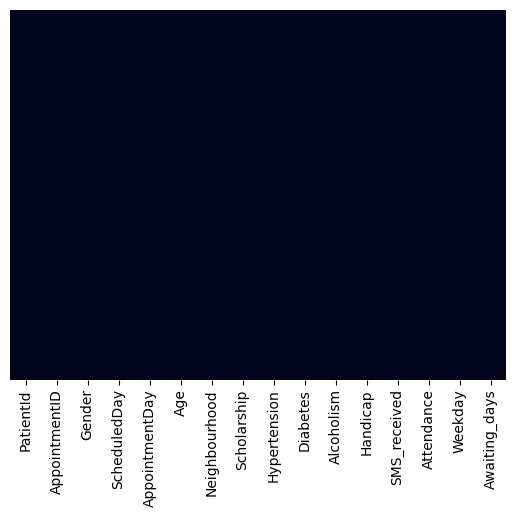

In [28]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [29]:
data.shape

(110526, 16)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  int64              
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hypertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  Attendance    

In [31]:
data_dup=data.duplicated().any()
data_dup

False

In [32]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Attendance',
       'Weekday', 'Awaiting_days'],
      dtype='object')

In [33]:
cont_cols = data.columns[data.dtypes!='object']
categorical_cols = data.columns[data.dtypes=='object']

In [34]:
cont_cols

Index(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'Awaiting_days'],
      dtype='object')

In [35]:
categorical_cols

Index(['Gender', 'Neighbourhood', 'Attendance', 'Weekday'], dtype='object')

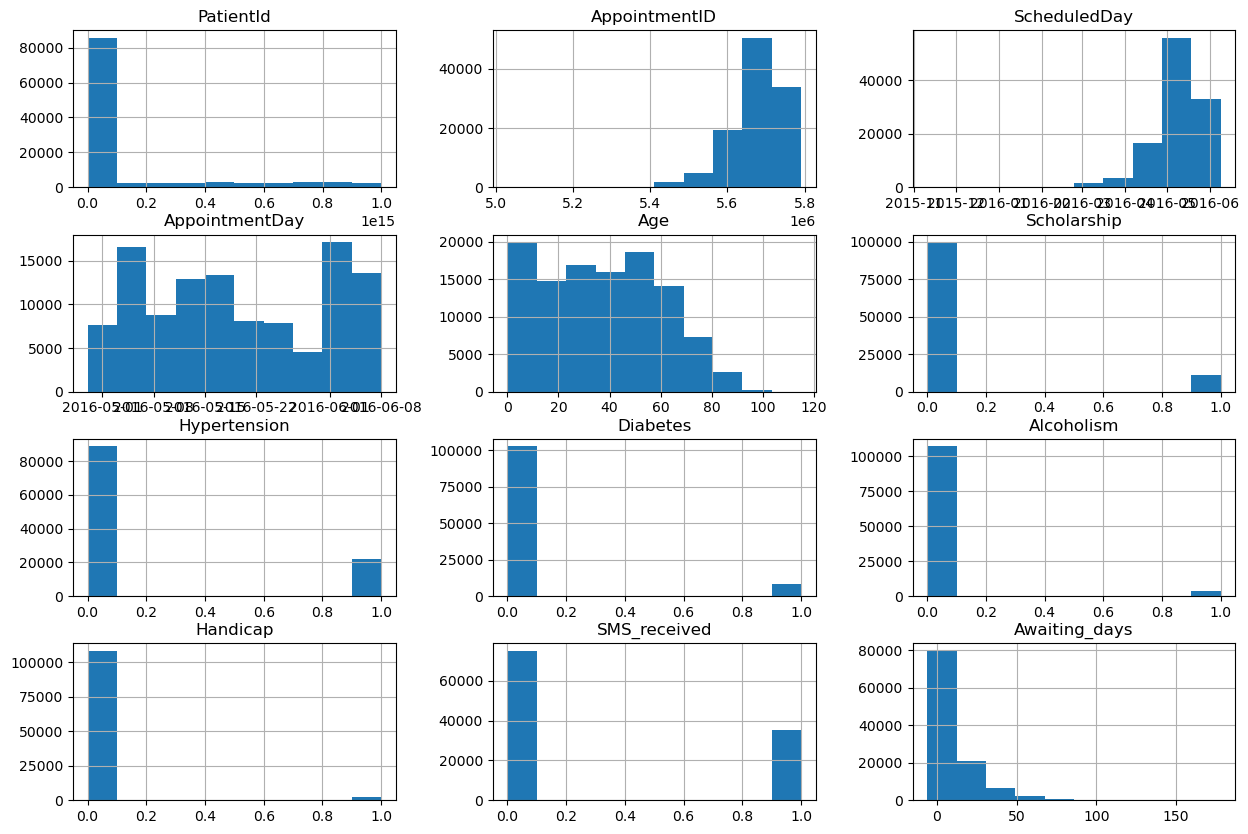

In [36]:
data.hist(figsize=(15,10));

# EXPLORATORY DATA ANALYSIS

In [37]:
# Performing EDA as well as  Convert categorical data to numerical data for the models

# 1] What is the ratio between Attended and Missed the Appointment?

In [38]:
data['Attendance'].unique()

array(['attended', 'missed'], dtype=object)

In [39]:
data['Attendance']=data['Attendance'].map({'attended':0,'missed':1}).astype('int')

In [40]:
data['Attendance'].unique()

array([0, 1])

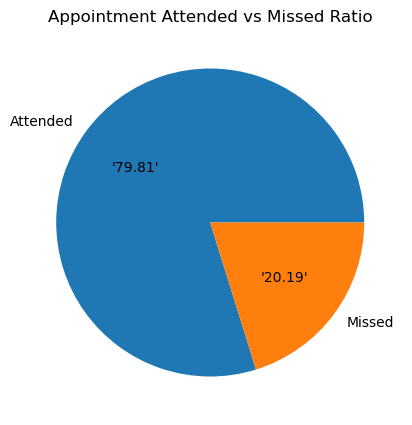

In [41]:
plt.figure(figsize=(8,5))
plt.title('Appointment Attended vs Missed Ratio')
plt.pie(data['Attendance'].value_counts(),labels=["Attended",'Missed'],autopct="'%.2f'")
plt.show()

# From the above Pie Chart we can infer that after booking the appointment 79.81% of the people attended the appointment and 20.19% of the people missed the appointment after booking.

# 2] What is the ratio between males and females?

In [42]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [43]:
data['Gender']=data['Gender'].map({'M':1,'F':0}).astype('int')

In [44]:
data['Gender'].unique()

array([0, 1])

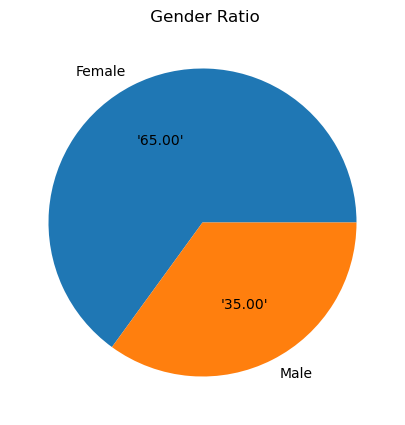

In [45]:
plt.figure(figsize=(8,5))
plt.title(' Gender Ratio')
plt.pie(data['Gender'].value_counts(),labels=["Female",'Male'],autopct="'%.2f'")
plt.show()

# From the above Pie chart we can infer that Females represent 65% from dataset and Males represents 35% only.

# 3] Who are the most attending and most committed to attending,males or females?

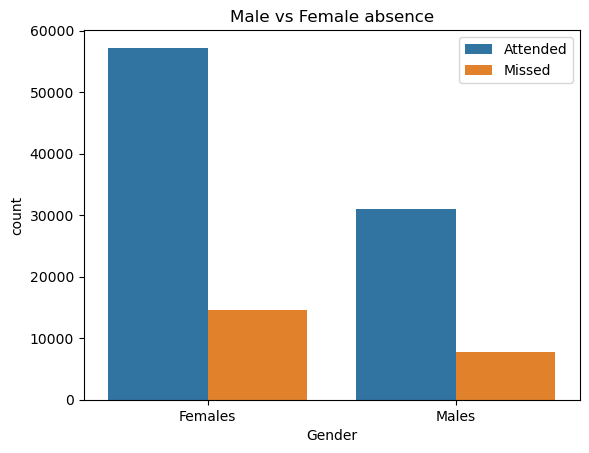

In [46]:
sns.countplot(x='Gender',hue='Attendance',data=data)
plt.title("Male vs Female absence")
plt.xticks([0,1],['Females','Males'])
plt.legend(labels=['Attended','Missed'])
plt.show()

# From the above Countplot we can infer that after booking the appointment Females attended as they takes more care of their as comparison to the Males.

# 4]As for the ages,who are the most attended for the appointment and who are most eager to attend the appointment?

C:\Users\harpr\AppData\Local\Temp\ipykernel_2528\2661743056.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Attendance'] == 0]["Age"], color='green', label='Attended')
C:\Users\harpr\AppData\Local\Temp\ipykernel_2528\2661743056.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

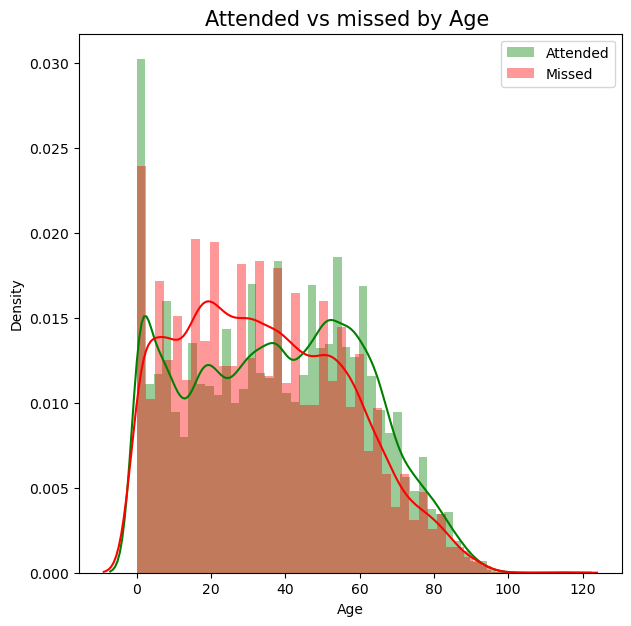

In [47]:
plt.figure(figsize=(7,7))
sns.distplot(data[data['Attendance'] == 0]["Age"], color='green', label='Attended')
sns.distplot(data[data['Attendance'] == 1]["Age"], color='red', label='Missed')
plt.title('Attended vs missed by Age ', fontsize=15)
plt.legend()
plt.show()

# From the above distplot we can see that Age has some values less than 0 and greater than 100. So I'll drop all the ages less than 0 and greater than 100.

In [48]:
data=data[(data['Age']<100) & (data['Age']>0)]

C:\Users\harpr\AppData\Local\Temp\ipykernel_2528\2661743056.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Attendance'] == 0]["Age"], color='green', label='Attended')
C:\Users\harpr\AppData\Local\Temp\ipykernel_2528\2661743056.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

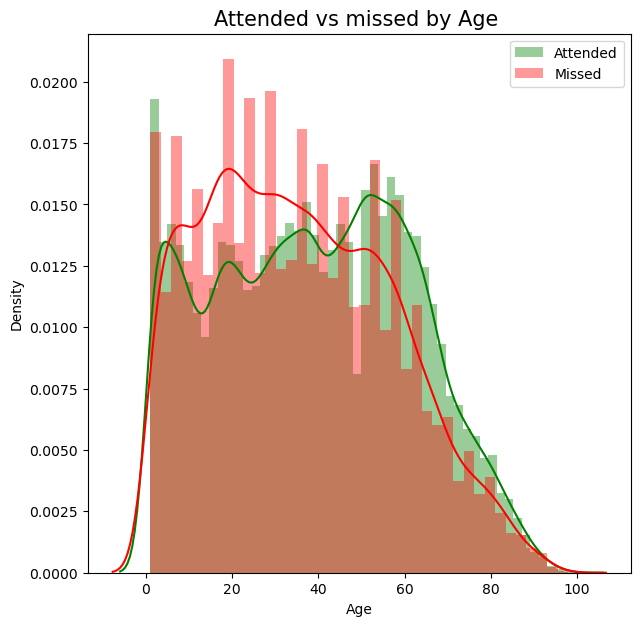

In [49]:
plt.figure(figsize=(7,7))
sns.distplot(data[data['Attendance'] == 0]["Age"], color='green', label='Attended')
sns.distplot(data[data['Attendance'] == 1]["Age"], color='red', label='Missed')
plt.title('Attended vs missed by Age ', fontsize=15)
plt.legend()
plt.show()

# Age seems to be an important factor to know in order to predict if a patient will attend for their scheduled appointment or not and we infer that majority of patients are of young age.

# 5] What is the most frequent scheduled date?

Text(0.5, 1.0, "'Scheduled Date' Line chart")

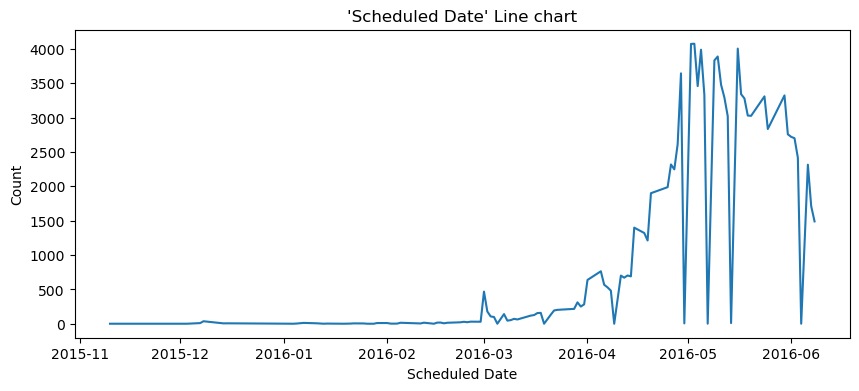

In [50]:
# line chart plot for Scheduled Date
data["ScheduledDay"].dt.date.value_counts().plot(kind="line",figsize=(10,4));
plt.xlabel("Scheduled Date")
plt.ylabel("Count")
plt.title("'Scheduled Date' Line chart")

# From the above line graph we can infer that the most Scheduled date is mainly between months of May and June of 2016

# 6] What is the most frequent appointment date?

Text(0.5, 1.0, "'Appointment Date' Line chart")

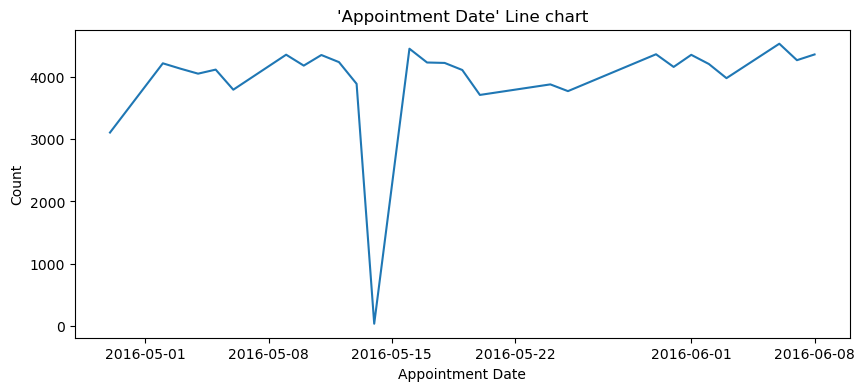

In [51]:
# line chart plot for Appointment Date
data['AppointmentDay'].dt.date.value_counts().plot(kind="line",figsize=(10,4));
plt.xlabel("Appointment Date")
plt.ylabel("Count")
plt.title("'Appointment Date' Line chart")

# The appointment dates mainly have the same number of patients yet, there is huge drop near 15/05/2016.

# 7] What is the number of patients by number of awaiting days?

<Axes: >

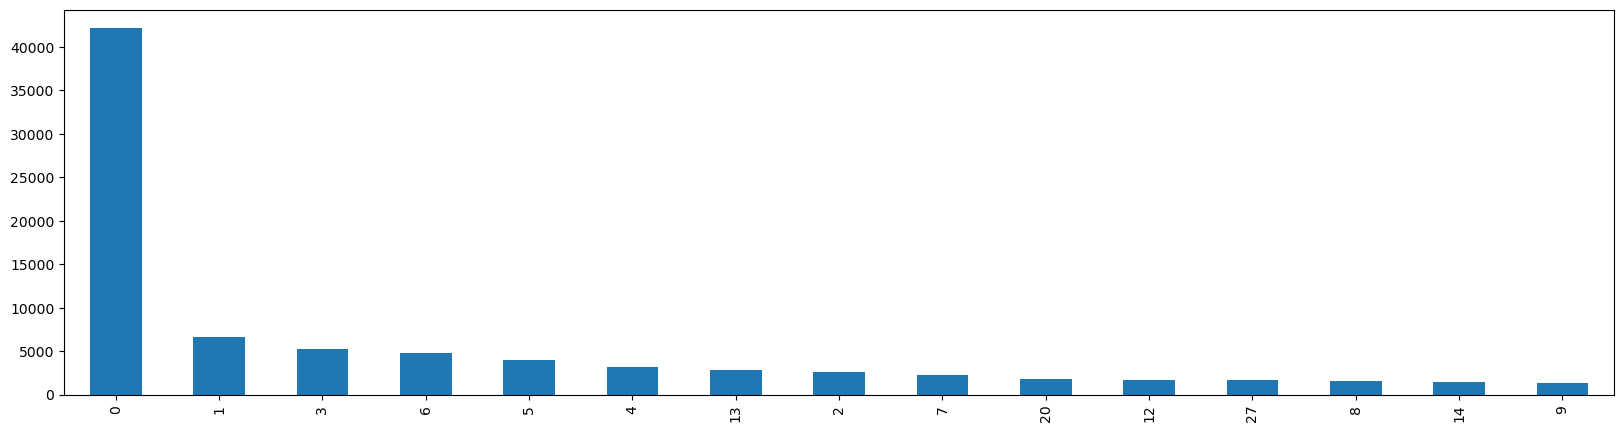

In [52]:
data.Awaiting_days.value_counts().head(15).plot(kind="bar",figsize=(20,5))

# From the above Bar graph we can infer that the highest number of patients is when the Awaiting days is 0.

C:\Users\harpr\AppData\Local\Temp\ipykernel_2528\3796004532.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Attendance'] == 0]["Awaiting_days"], color='green', label='Attended')
C:\Users\harpr\AppData\Local\Temp\ipykernel_2528\3796004532.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

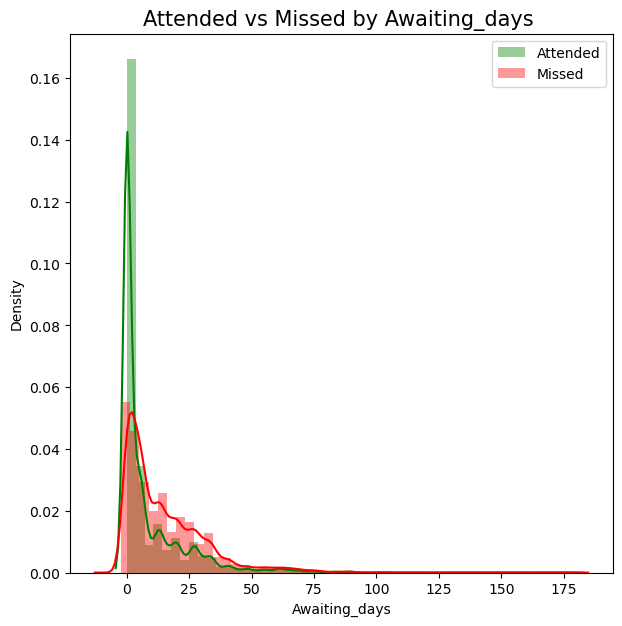

In [53]:
plt.figure(figsize=(7,7))
sns.distplot(data[data['Attendance'] == 0]["Awaiting_days"], color='green', label='Attended')
sns.distplot(data[data['Attendance'] == 1]["Awaiting_days"], color='red', label='Missed')
plt.title('Attended vs Missed by Awaiting_days ', fontsize=15)
plt.legend()
plt.show()

# From the above distplot we can infer that when the awaiting days is shorter, the patient is more more likely to attend  their appointment.

# 8] Is there any increase in the attendance of the people after offering the Scholarship?

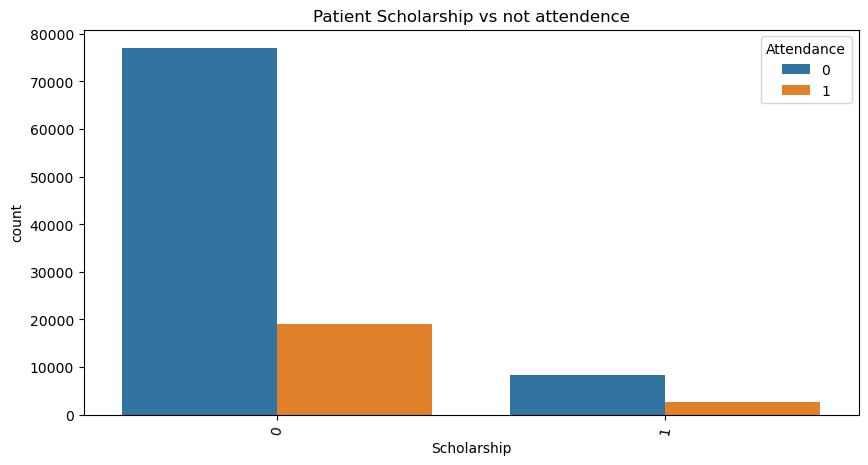

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Scholarship'],hue=data['Attendance'])
plt.title("Patient Scholarship vs not attendence")
plt.xticks(rotation=80)
plt.show()

# From the above Countplot we can infer that even after offering the Scholarship there is no increase in the participation of the people.

# 9] Is the diseases Hypertension,Diabetes,Alcoholism,Handicap affect the attendance ?

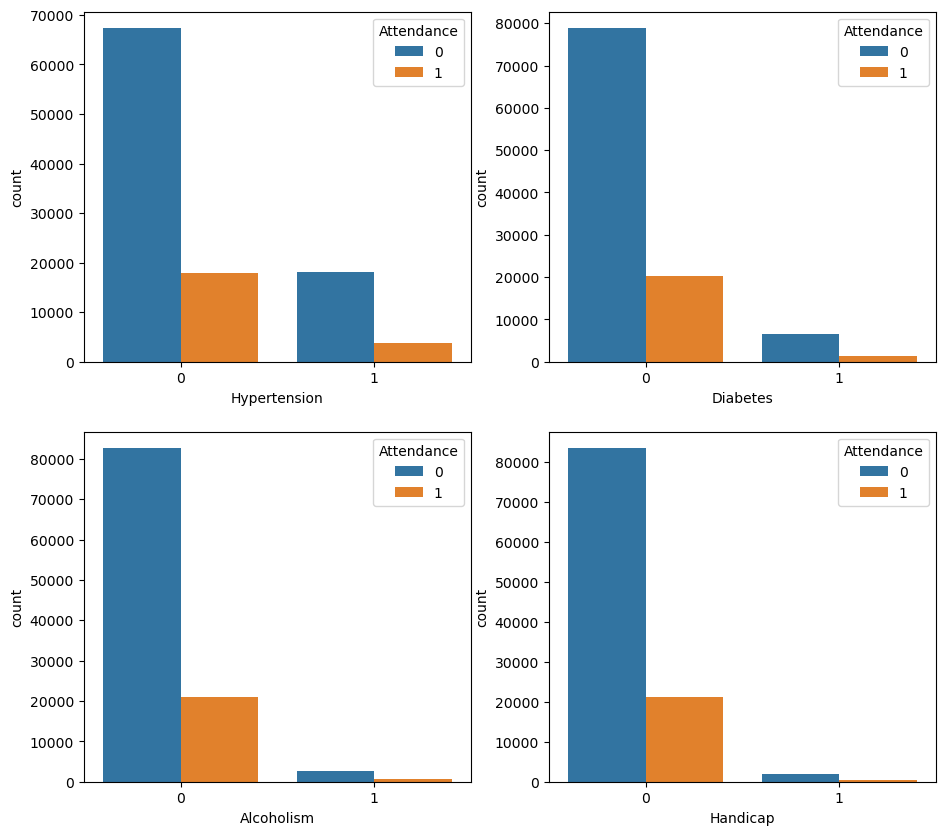

In [55]:
plt.figure(figsize=(11,10))
plt.subplot(2,2,1)           
sns.countplot(x='Hypertension',hue='Attendance',data=data)
plt.subplot(2,2,2)           
sns.countplot(x='Diabetes',hue='Attendance',data=data)
plt.subplot(2,2,3)           
sns.countplot(x='Alcoholism',hue='Attendance',data=data)
plt.subplot(2,2,4)           
sns.countplot(x='Handicap',hue='Attendance',data=data)
plt.show()

# From the above countplot of all the diseases we can infer that there are more patient suffers from Hypertension and is the  strong factor for higher attendance frequency
# The diseases factor affects the attendance as the patient with all the above diseases have less absents.


# 10]  Does sending SMS remind patients to attend the appointment? 

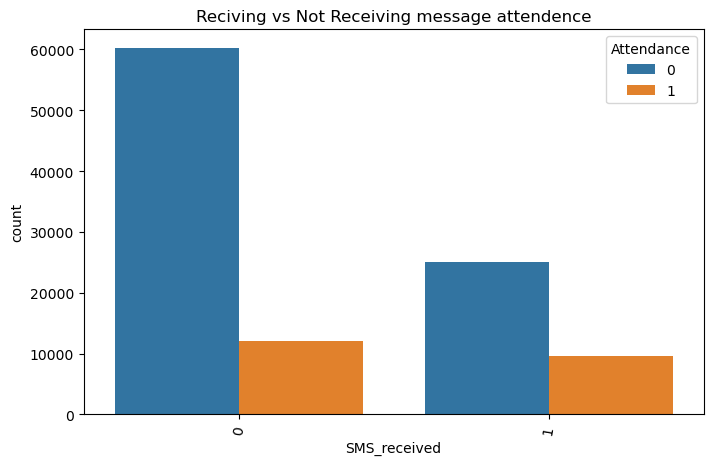

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['SMS_received'],hue=data['Attendance'])
plt.title("Reciving vs Not Receiving message attendence")
plt.xticks(rotation=80)
plt.show()

# unfortunately SMS not help patients to attend the appointment.

# 11] What is the count of patients in each neighbourhood?

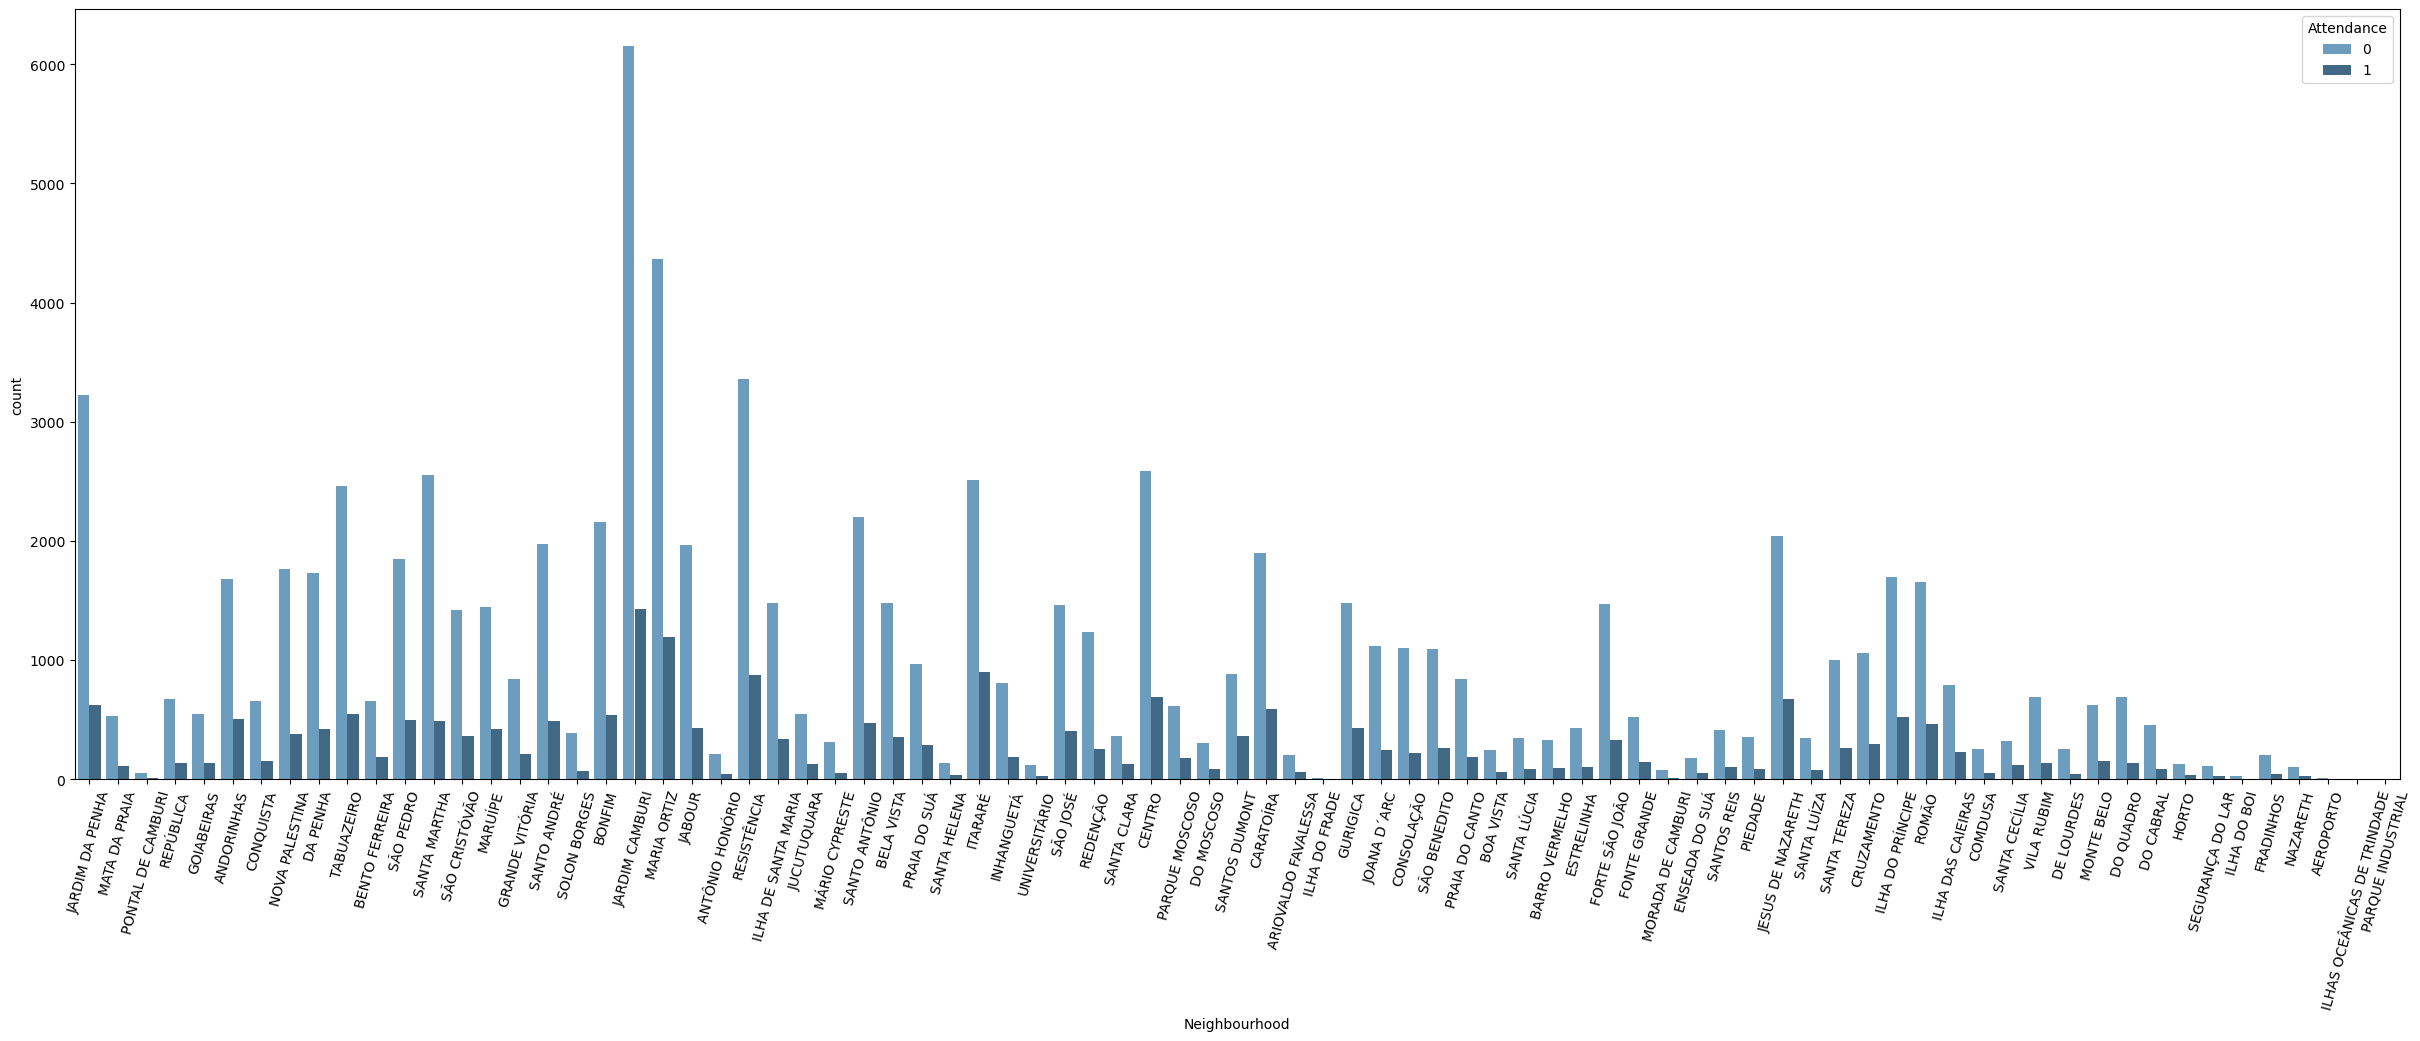

In [57]:
plt.figure(figsize=(30,10))
chart=sns.countplot(x='Neighbourhood',data=data,hue='Attendance',palette='Blues_d')
chart.set_xticklabels(chart.get_xticklabels(),rotation=75);

# From the above bar graph we can infer that JARDIM CAMBURI and MARIA ORTIZ are most cities in which patients attended the medical appointment the most.

In [58]:
#Convert categorical data to numerical data for the models
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["Neighbourhood"] = encoder.fit_transform(data["Neighbourhood"])

In [59]:
data["Neighbourhood"].nunique()

81

# 12] Which day of the week has more appointment?

<Axes: xlabel='Weekday', ylabel='count'>

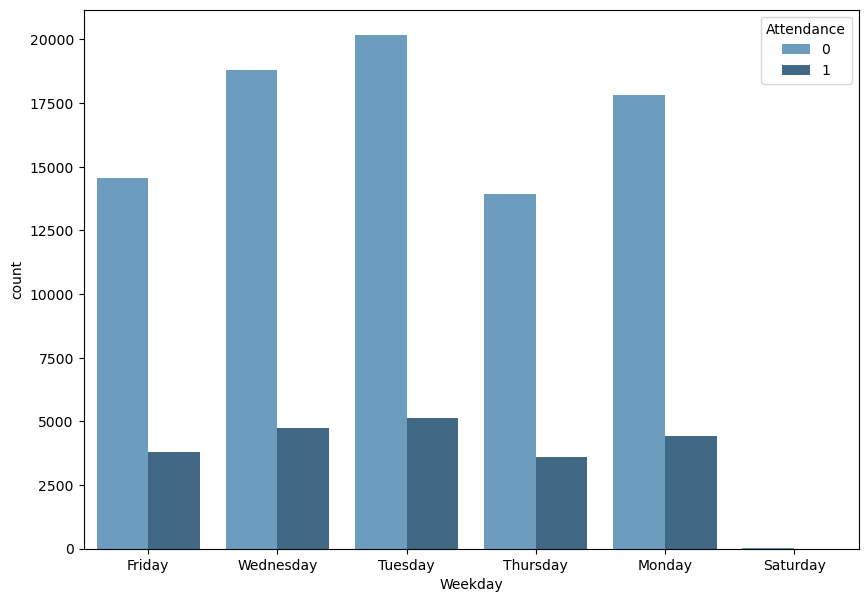

In [60]:
plt.figure(figsize=(10,7))
sns.countplot(x='Weekday',data=data,hue='Attendance',palette='Blues_d')

# From the above graph we can infer that from the weekdays Tuesday has the highest number of appointment, followed by Wednesday and Saturday may be holiday because saturday did not have any appointment. 


In [61]:
##Applying Weekday column where 0 represents Monday
data['Weekday']=data['ScheduledDay'].dt.dayofweek

In [62]:
data['Weekday'].value_counts()

1    25278
2    23544
0    22242
4    18372
3    17518
5       22
Name: Weekday, dtype: int64

In [63]:
data.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [64]:
data.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,Weekday,Awaiting_days
0,0,62,39,0,1,0,0,0,0,0,4,0
1,1,56,39,0,0,0,0,0,0,0,4,0
2,0,62,45,0,0,0,0,0,0,0,4,0
3,0,8,54,0,0,0,0,0,0,0,4,0
4,0,56,39,0,1,1,0,0,0,0,4,0


In [65]:
## Model Building

In [66]:
x=data.drop('Attendance',axis=1)
y=data['Attendance']

In [67]:
x

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Weekday,Awaiting_days
0,0,62,39,0,1,0,0,0,0,4,0
1,1,56,39,0,0,0,0,0,0,4,0
2,0,62,45,0,0,0,0,0,0,4,0
3,0,8,54,0,0,0,0,0,0,4,0
4,0,56,39,0,1,1,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
110522,0,56,43,0,0,0,0,0,1,1,34
110523,0,51,43,0,0,0,0,0,1,1,34
110524,0,21,43,0,0,0,0,0,1,2,40
110525,0,38,43,0,0,0,0,0,1,2,40


In [68]:
y

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: Attendance, Length: 106976, dtype: int32

# A- Logistic Regression Model

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [71]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [72]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
y_pred1 = logreg.predict(x_test)
print("Accuracy={:.2f}%".format(logreg.score(x_test, y_test)*100))

Accuracy=79.61%


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     25646
           1       0.33      0.01      0.03      6447

    accuracy                           0.80     32093
   macro avg       0.57      0.50      0.46     32093
weighted avg       0.71      0.80      0.71     32093



In [74]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, x, y, cv=5)
print("Average Accuracy :{:.2f}%".format((sum(scores)/len(scores))*100))

Average Accuracy :79.28%


In [75]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred1)
cf_matrix

array([[25455,   191],
       [ 6352,    95]], dtype=int64)

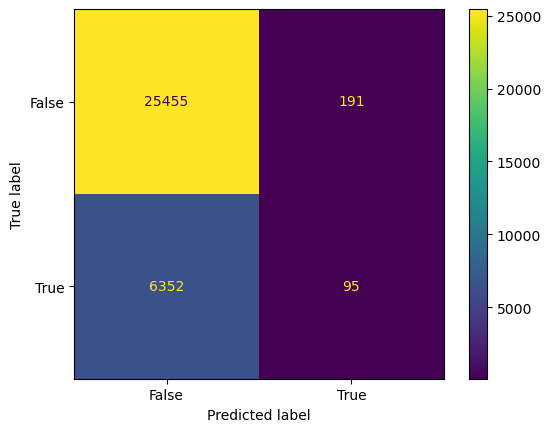

In [76]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# B- Decision Tree Model

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
treemodel = DecisionTreeClassifier()
treemodel.fit(x_train, y_train)
y_pred2 = treemodel.predict(x_test)
print("Accuracy={:.2f}%".format(treemodel.score(x_test, y_test)*100))

Accuracy=72.67%


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     25646
           1       0.33      0.34      0.33      6447

    accuracy                           0.73     32093
   macro avg       0.58      0.58      0.58     32093
weighted avg       0.73      0.73      0.73     32093



In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treemodel, x, y, cv=5)
print("Average Accuracy :{:.2f}%".format((sum(scores)/len(scores))*100))

Average Accuracy :71.24%


In [81]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred2)
cf_matrix

array([[21156,  4490],
       [ 4281,  2166]], dtype=int64)

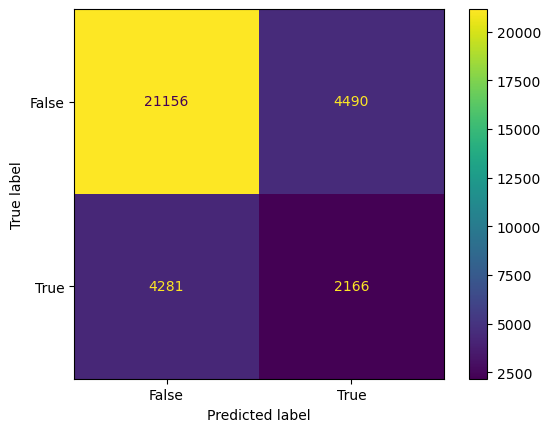

In [82]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# C- Random Forest 

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred3 = model.predict(x_test)
print("Accuracy={:.2f}%".format(model.score(x_test, y_test)*100))

Accuracy=77.66%


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87     25646
           1       0.39      0.19      0.26      6447

    accuracy                           0.78     32093
   macro avg       0.60      0.56      0.56     32093
weighted avg       0.73      0.78      0.75     32093



In [86]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print("Average Accuracy :{:.2f}%".format((sum(scores)/len(scores))*100))

Average Accuracy :76.53%


In [87]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred3)
cf_matrix

array([[23683,  1963],
       [ 5208,  1239]], dtype=int64)

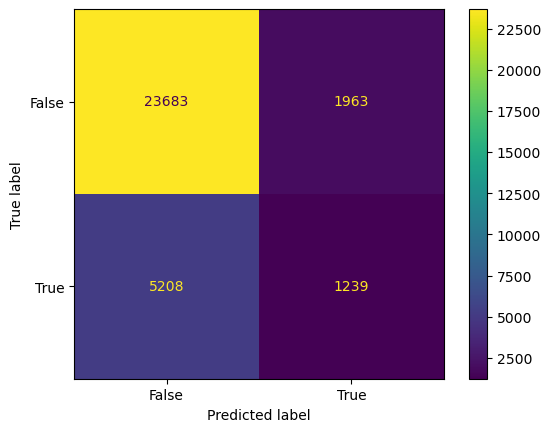

In [88]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# D. GradientBoosting Classifier

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred4 = gb.predict(x_test)
print("Accuracy={:.2f}%".format(gb.score(x_test, y_test)*100))

Accuracy=79.93%


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     25646
           1       0.53      0.01      0.01      6447

    accuracy                           0.80     32093
   macro avg       0.67      0.50      0.45     32093
weighted avg       0.75      0.80      0.71     32093



In [92]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb, x, y, cv=5)
print("Average Accuracy :{:.2f}%".format((sum(scores)/len(scores))*100))

Average Accuracy :79.52%


In [93]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred4)
cf_matrix

array([[25607,    39],
       [ 6403,    44]], dtype=int64)

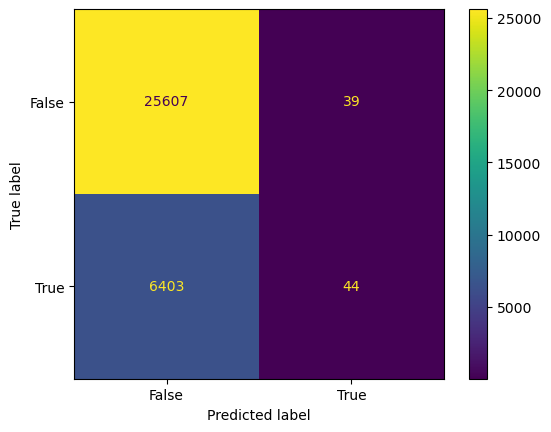

In [94]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Hyperparameter Tuning

In [96]:
import warnings
warnings.filterwarnings("ignore")

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [99]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             n_iter=20,cv=5,verbose=True)

In [100]:
rs_log_reg.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [101]:
acc1=rs_log_reg.best_score_

In [102]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0006951927961775605}

In [103]:
tree_grid={'criterion':('gini','entropy','log-loss'),
           'splitter':('best','random'),
           'max_depth':(1,2,3,4),
           'max_features':('auto','sqrt','log2')}

In [104]:
rs_tree=RandomizedSearchCV(DecisionTreeClassifier(),
                          param_distributions=tree_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

In [105]:
rs_tree.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ('gini', 'entropy',
                                                      'log-loss'),
                                        'max_depth': (1, 2, 3, 4),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'splitter': ('best', 'random')},
                   verbose=True)

In [106]:
acc2=rs_tree.best_score_

In [107]:
rs_tree.best_params_

{'splitter': 'random',
 'max_features': 'auto',
 'max_depth': 4,
 'criterion': 'gini'}

In [108]:
rf_grid={'n_estimators':np.arange(20,60,80),
        'max_features':['auto','sqrt'],
        'max_depth':[None,3,5,10],
        'min_samples_split':[2,5,10,20],
        'min_samples_leaf':[1,2,5,10],
        'bootstrap':[True,False]
        }

In [109]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         random_state=42,
                         verbose=2,
                         n_jobs=-1)

In [110]:
rs_rf.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': array([20])},
                   random_state=42, verbose=2)

In [111]:
acc3=rs_rf.best_score_

In [112]:
rs_rf.best_params_

{'n_estimators': 20,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': True}

In [113]:
gb_grid={'n_estimators':[5,50,250,500],
        'max_features':['auto'],
        'max_depth':[1,3,5,7,9],
        'learning_rate':[0.01,0.1,1,10,100],
        }

In [114]:
rs_gb=RandomizedSearchCV(GradientBoostingClassifier(),
                         param_distributions=gb_grid,
                         cv=5,
                         n_iter=20,
                         random_state=42,
                         verbose=2,
                         n_jobs=-1)

In [115]:
rs_gb.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'max_features': ['auto'],
                                        'n_estimators': [5, 50, 250, 500]},
                   random_state=42, verbose=2)

In [116]:
acc4=rs_gb.best_score_

In [117]:
rs_gb.best_params_

{'n_estimators': 5,
 'max_features': 'auto',
 'max_depth': 1,
 'learning_rate': 0.01}

In [118]:
results=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier'],
                     'Accuracy Score':[acc1,acc2,acc3,acc4]})
result_data=results.sort_values(by='Accuracy Score',ascending=False)
result_data=result_data.set_index('Model')
result_data

,Accuracy Score
Model,
DecisionTreeClassifier,0.797394
RandomForestClassifier,0.797366
GradientBoostingClassifier,0.797366
LogisticRegression,0.793299


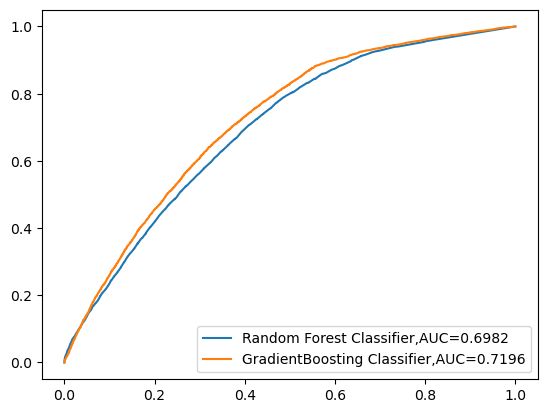

In [134]:
plt.figure(0).clf()
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred1=model.predict_proba(x_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred1)
auc=round(metrics.roc_auc_score(y_test,y_pred1),4)
plt.plot(fpr,tpr,label="Logistic Regression,AUC="+str(auc))

plt.figure(0).clf()
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred2=model.predict_proba(x_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred2)
auc=round(metrics.roc_auc_score(y_test,y_pred2),4)
plt.plot(fpr,tpr,label="Decision Tree Classifier,AUC="+str(auc))

plt.figure(0).clf()
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred3=model.predict_proba(x_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred3)
auc=round(metrics.roc_auc_score(y_test,y_pred3),4)
plt.plot(fpr,tpr,label="Random Forest Classifier,AUC="+str(auc))




model=GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred4=model.predict_proba(x_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred4)
auc=round(metrics.roc_auc_score(y_test,y_pred4),4)
plt.plot(fpr,tpr,label="GradientBoosting Classifier,AUC="+str(auc))

plt.legend()
plt.show()

# Save the Model

In [121]:
x = data[['Gender', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'Weekday', 'Awaiting_days']]
y = data['Attendance']

In [122]:
rf=RandomForestClassifier(n_estimators=270,
                         min_samples_split=5,
                         min_samples_leaf=5,
                         max_features='sqrt',
                         max_depth=5)

In [123]:
rf.fit(x,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

In [124]:
import joblib

In [125]:
joblib.dump(rf,'Attendance_Predict')

['Attendance_Predict']

In [126]:
model=joblib.load("Attendance_predict")

In [127]:
data=pd.DataFrame({
    'Gender':0,
    'Age':50,
    'Neighbourhood':2,
    'Scholarship':0,
    'Hypertension':1,
    'Diabetes':0,
    'Alcoholism':1,
    'Handicap':2,
    'SMS_received':0,
    'Weekday':1,
    'Awaiting_days':0
    
},index=[0])

In [128]:
data

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Weekday,Awaiting_days
0,0,50,2,0,1,0,1,2,0,1,0


In [129]:
result=model.predict(data)

In [130]:
if result==0:
    print("Attended")
else:
    print("Missed")

Attended


# GUI

In [131]:
from tkinter import *
import joblib

In [132]:
def show_entry():
    
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get())
    p10=float(e10.get())
    p11=float(e11.get())
    
    
    model =joblib.load("Attendance_predict")
    data=pd.DataFrame({
        'Gender':p1,
        'Age':p2,
        'Neighbourhood':p3,
        'Scholarship':p4,
        'Hypertension':p5,
        'Diabetes':p6,
        'Alcoholism':p7,
        'Handicap':p8,
        'SMS_received':p9,
        'Weekday':p10,
        'Awaiting_days':p11
    },index=[0])
    result=model.predict(data)
        
    if result==1:
        Label(master,text="Attended").grid(row=31)
    else:
        Label(master,text="Missed").grid(row=31)
            
master=Tk()
master.title("Indian Appointment Status No_show")
label=Label(master,text='Attendance Prediction',bg="black",
            fg="white").grid(row=0,columnspan=2)

Label(master,text="Gender [1:Male,0:Female]").grid(row=1)
Label(master,text="Enter Your Age").grid(row=2)
Label(master,text="Enter the Neighbourhood").grid(row=3)
Label(master,text="Scholarship [0/1]").grid(row=4)
Label(master,text="Hypertension [0/1]").grid(row=5)
Label(master,text="Diabetes [0/1]").grid(row=6)
Label(master,text="Alcoholism [0/1]").grid(row=7)
Label(master,text="Handicap [0-4]").grid(row=8)
Label(master,text="SMS_received [0/1]").grid(row=9)
Label(master,text="Enter the Weekday").grid(row=10)
Label(master,text="Enter the Awaiting_days").grid(row=11)


e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)





Button(master,text='Predict',command=show_entry).grid()

mainloop()